In [58]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Load Dataset
df = pd.read_excel(r"C:\Users\rohit\Desktop\Customer segmentation project\marketing_campaign.xlsx")

# Quick look
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [60]:
#Dataset Info & Missing Values
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Null Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---", df.duplicated().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetPro

In [61]:
print('----- Data Description -----')
df.describe().T

----- Data Description -----


,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [62]:
#Data Cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing income with median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convert date to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [63]:
print('------ Unique Values ------')
df.nunique()

------ Unique Values ------


ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [64]:
# since the Z_CostContact ,Z_Revenue have only single values so there will be no relevance in the model development
# so we are droping   Z_CostContact ,Z_Revenue columns
df.drop(['Z_CostContact' ,'Z_Revenue' ],axis=1,inplace=True)


In [65]:
#Feature Engineering
# Age
df['Age'] = 2025 - df['Year_Birth']

# Family size
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1  # +1 for customer

# Total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Total accepted campaigns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Accepted_Campaigns'] = df[campaign_cols].sum(axis=1)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Total_Spending,Total_Accepted_Campaigns
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68,1,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71,3,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60,1,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41,2,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,2,422,0


In [66]:
for col in spending_cols:
    df[col + '_Share'] = df[col] / df['Total_Spending']


In [67]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Family_Size',
       'Total_Spending', 'Total_Accepted_Campaigns', 'MntWines_Share',
       'MntFruits_Share', 'MntMeatProducts_Share', 'MntFishProducts_Share',
       'MntSweetProducts_Share', 'MntGoldProds_Share'],
      dtype='object')

In [68]:
# Spending per Family Member

df['Spending_per_person'] =df['Total_Spending'] /df['Family_Size']
df['Spending_per_person'] 

0       1617.000000
1          9.000000
2        776.000000
3         26.500000
4        211.000000
           ...     
2235     670.500000
2236     111.000000
2237    1241.000000
2238     421.500000
2239      57.333333
Name: Spending_per_person, Length: 2240, dtype: float64

In [69]:
# Total purchases across all channels
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Avoid division by zero
for col in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    df[col + '_Share'] = df[col] / df['Total_Purchases'].replace(0, 1)


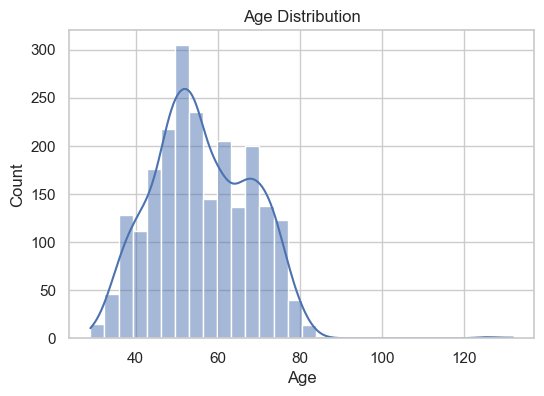

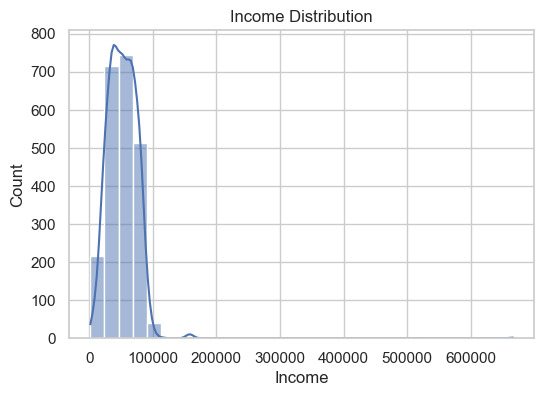

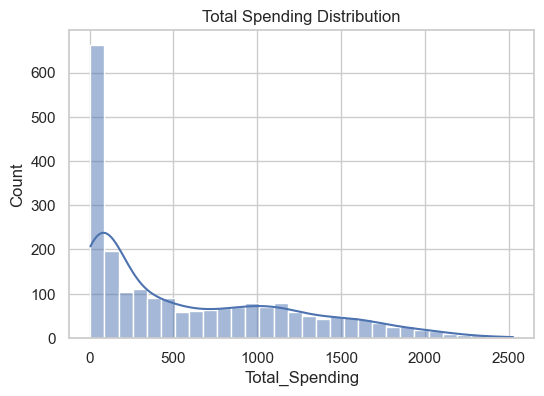

In [70]:
#Univariate Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.show()


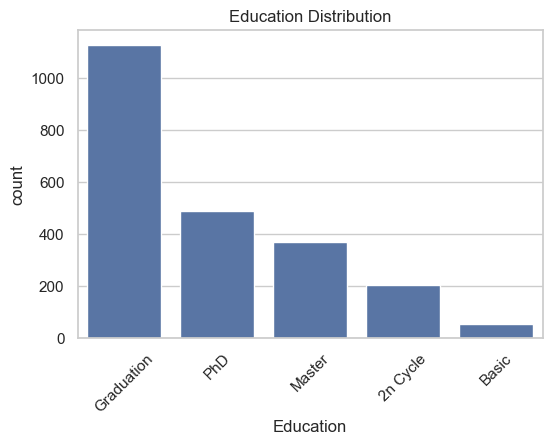

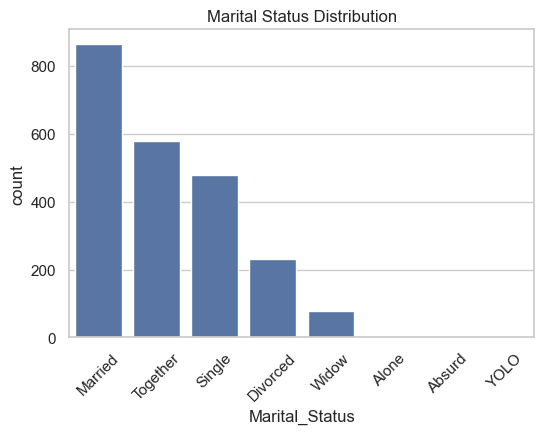

In [71]:
#Categorical Counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()


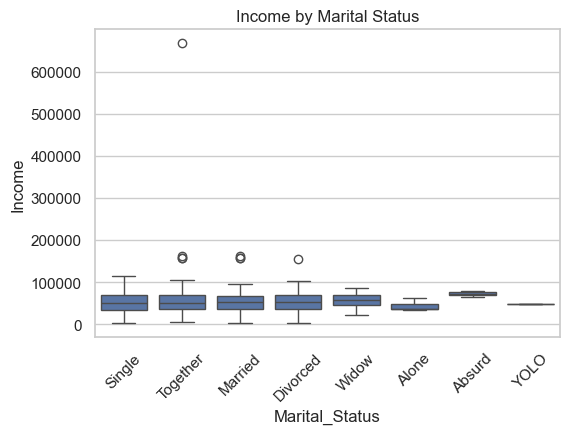

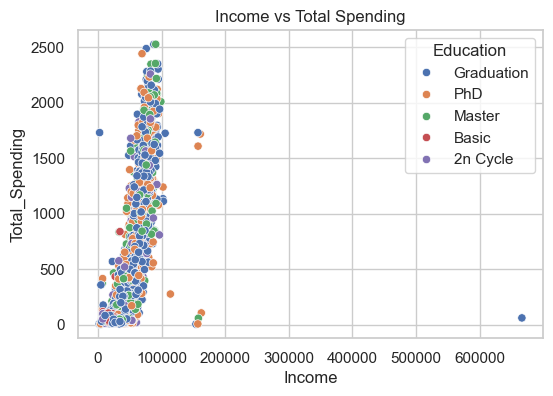

In [72]:
#Bivariate Analysis
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Marital_Status', y='Income')
plt.title('Income by Marital Status')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Education')
plt.title('Income vs Total Spending')
plt.show()


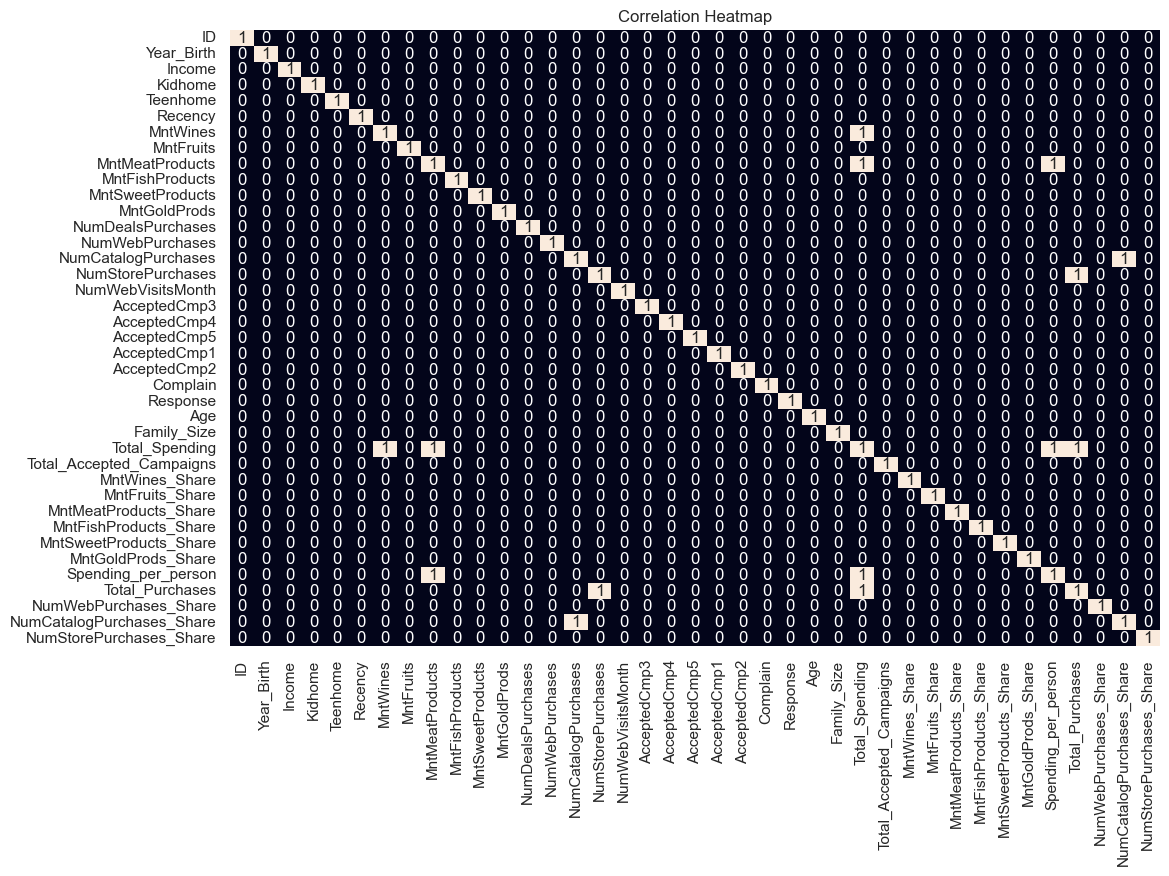

In [73]:
# Correlation Heatmap (Numeric Only)
numeric_df = df.select_dtypes(include=[np.number])  # keep only numeric columns

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr()>0.8, annot=True,cbar=False)
plt.title('Correlation Heatmap')
plt.show()


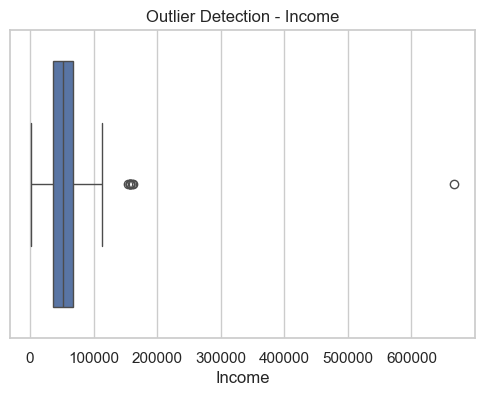

In [74]:
#Outlier Detection Example
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Income'])
plt.title('Outlier Detection - Income')
plt.show()


In [75]:
#Save Cleaned Data
df.to_csv("marketing_campaign_cleaned.csv", index=False)
print("✅ Cleaned data saved to marketing_campaign_cleaned.csv")


✅ Cleaned data saved to marketing_campaign_cleaned.csv


In [76]:
clean_data=pd.read_csv(r'C:\Users\rohit\Desktop\Customer segmentation project\marketing_campaign_cleaned.csv')

In [77]:
clean_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Family_Size',
       'Total_Spending', 'Total_Accepted_Campaigns', 'MntWines_Share',
       'MntFruits_Share', 'MntMeatProducts_Share', 'MntFishProducts_Share',
       'MntSweetProducts_Share', 'MntGoldProds_Share', 'Spending_per_person',
       'Total_Purchases', 'NumWebPurchases_Share', 'NumCatalogPurchases_Share',
       'NumStorePurchases_Share'],
      dtype='object')

In [78]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2240 non-null   int64  
 1   Year_Birth                 2240 non-null   int64  
 2   Education                  2240 non-null   object 
 3   Marital_Status             2240 non-null   object 
 4   Income                     2240 non-null   float64
 5   Kidhome                    2240 non-null   int64  
 6   Teenhome                   2240 non-null   int64  
 7   Dt_Customer                2240 non-null   object 
 8   Recency                    2240 non-null   int64  
 9   MntWines                   2240 non-null   int64  
 10  MntFruits                  2240 non-null   int64  
 11  MntMeatProducts            2240 non-null   int64  
 12  MntFishProducts            2240 non-null   int64  
 13  MntSweetProducts           2240 non-null   int64

In [79]:
from sklearn.preprocessing import LabelEncoder
for col in clean_data.columns:
    if clean_data[col].dtype==object:
        LE=LabelEncoder()
        clean_data[col]=LE.fit_transform(clean_data[col])

LE


LabelEncoder()

In [80]:
clean_data[['Education', 'Marital_Status']]

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3
...,...,...
2235,2,3
2236,4,5
2237,2,2
2238,3,5


In [ ]:
features = [
    'Income', 'Age', 'Family_Size',
    'Total_Spending', 'Spending_per_person',
    'MntWines_Share', 'MntFruits_Share', 'MntMeatProducts_Share',
    'MntFishProducts_Share', 'MntSweetProducts_Share', 'MntGoldProds_Share',
    'Total_Accepted_Campaigns', 'Recency',
    'NumWebPurchases_Share', 'NumCatalogPurchases_Share', 'NumStorePurchases_Share',
    'NumWebVisitsMonth'
]

x = df[features]
x


,Income,Age,Family_Size,Total_Spending,Spending_per_person,MntWines_Share,MntFruits_Share,MntMeatProducts_Share,MntFishProducts_Share,MntSweetProducts_Share,MntGoldProds_Share,Total_Accepted_Campaigns,Recency,NumWebPurchases_Share,NumCatalogPurchases_Share,NumStorePurchases_Share,NumWebVisitsMonth
0,58138.0,68,1,1617,1617.000000,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1,58,0.363636,0.454545,0.181818,7
1,46344.0,71,3,27,9.000000,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,38,0.250000,0.250000,0.500000,5
2,71613.0,60,1,776,776.000000,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,26,0.400000,0.100000,0.500000,4
3,26646.0,41,2,53,26.500000,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,26,0.333333,0.000000,0.666667,6
4,58293.0,44,2,422,211.000000,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,94,0.357143,0.214286,0.428571,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,2,1341,670.500000,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0,46,0.562500,0.187500,0.250000,5
2236,64014.0,79,4,444,111.000000,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,1,56,0.533333,0.133333,0.333333,7
2237,56981.0,44,1,1241,1241.000000,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,1,91,0.111111,0.166667,0.722222,6
2238,69245.0,69,2,843,421.500000,0.507711,0.035587,0.253855,0.094899,0.035587,0.072361,0,8,0.285714,0.238095,0.476190,3


In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_values=scaler.fit_transform(x)
scaled_values

array([[ 0.23569584,  0.98534473, -1.2645053 , ...,  2.06229981,
        -2.12610567,  0.69390374],
       [-0.23545419,  1.23573295,  1.39636071, ...,  0.60859184,
        -0.02615716, -0.13046347],
       [ 0.77399892,  0.3176428 , -1.2645053 , ..., -0.45746067,
        -0.02615716, -0.54264708],
       ...,
       [ 0.18947568, -1.01776106, -1.2645053 , ...,  0.01634045,
         1.44047355,  0.28172013],
       [ 0.67940139,  1.06880747,  0.06592771, ...,  0.5239845 ,
        -0.18329616, -0.95483068],
       [ 0.02520835,  1.23573295,  1.39636071, ..., -0.27978525,
        -0.02615716,  0.69390374]])

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=22)
pca_data = pca.fit_transform(scaled_values)
pca_data

array([[ 3.29773382, -0.62498549],
       [-1.08435104,  0.43578101],
       [ 0.82275385, -0.09878469],
       ...,
       [ 1.75165801,  0.38889879],
       [ 1.04637684,  0.27345624],
       [-0.76717844,  1.6207995 ]])

In [84]:
#KMeans building
from sklearn.cluster import KMeans
from sklearn import metrics
wcss=[]
silhouette_scores = []
K_range = range(2, 21)  

for i in range(2,21):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=500,random_state=22)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
    sil_score = metrics.silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

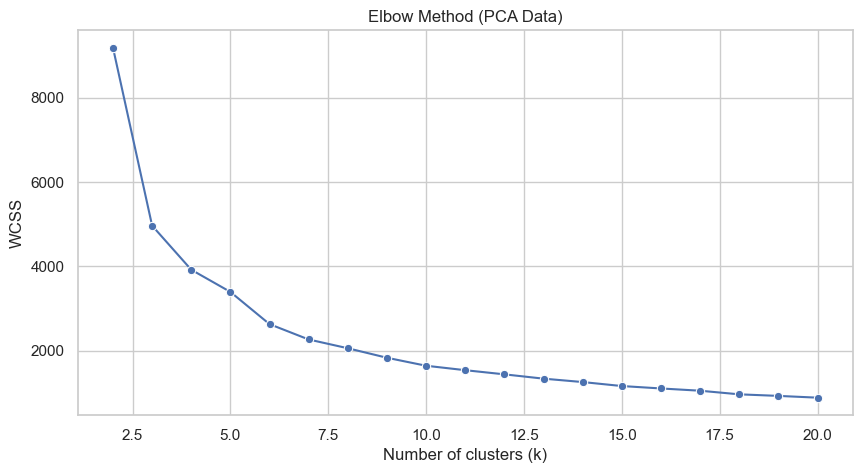

In [85]:
#elbow technique for choosing the k value
plt.figure(figsize=(10,5))
sns.lineplot(x=range(2,21),y=wcss, marker="o")
plt.title("Elbow Method (PCA Data)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

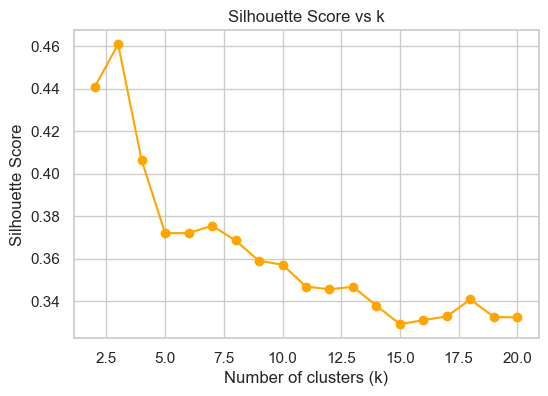

In [86]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

In [87]:
best_k = 3
kmeans= KMeans(n_clusters=best_k ,
                   init='k-means++',
                   max_iter=500,
                   random_state=22)
segments=kmeans.fit_predict(pca_data)
segments

array([0, 2, 2, ..., 0, 2, 2])

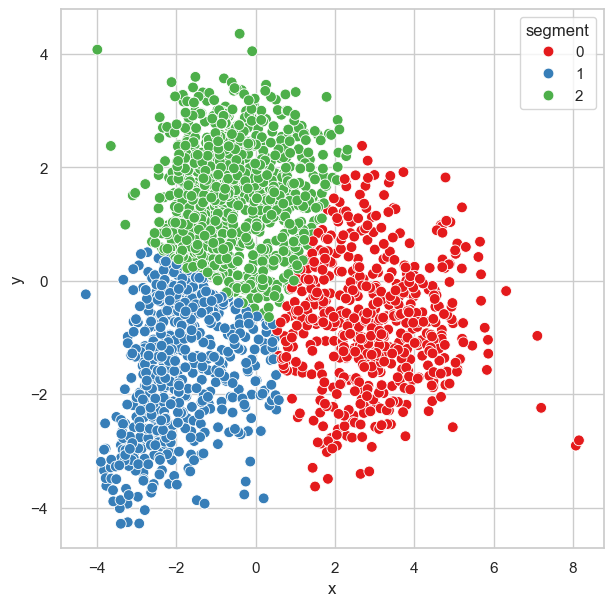

In [88]:
plt.figure(figsize=(7, 7))
df_pca = pd.DataFrame({'x': pca_data[:, 0], 'y': pca_data[:, 1], 'segment': segments})
sns.scatterplot(x='x', y='y', hue='segment', data=df_pca, palette="Set1", s=60)
plt.show()

In [89]:

sil_kmeans=metrics.silhouette_score(pca_data,segments)
sil_kmeans

0.46097836103997714

In [90]:
#DBSCAN BUILDING
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics


In [91]:
# Build and fit DBSCAN model
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')  # You can tune eps & min_samples
clusters = db.fit_predict(scaled_values)

# Add cluster labels to dataframe
df['DBSCAN_Cluster'] = clusters

# Check number of customers in each cluster
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    2154
-1      86
Name: count, dtype: int64


In [92]:
model=db.fit(pca_data)
label=model.labels_

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters
n_clusters=len(set(label))-(1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


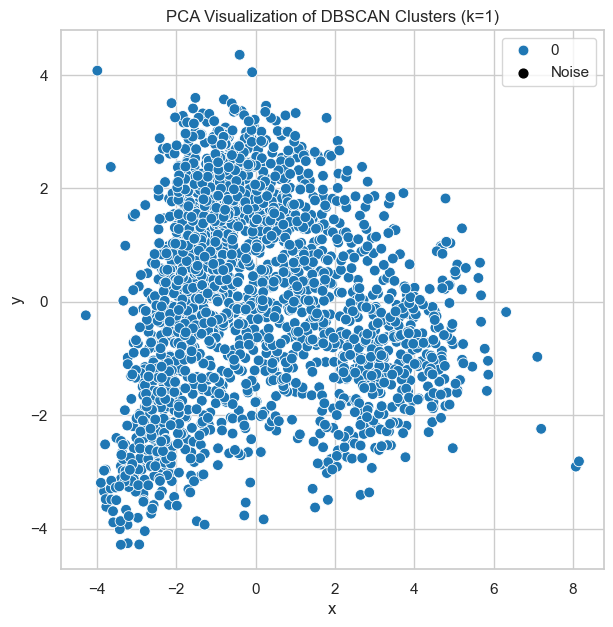

In [93]:

plt.figure(figsize=(7, 7))
df_pca = pd.DataFrame({'x': pca_data[:, 0], 'y': pca_data[:, 1],'cluster': label})
sns.scatterplot(x='x', y='y', hue='cluster', data=df_pca, palette='tab10',legend='full', s=60)

# Highlight noise points (-1) in black
plt.scatter(
    df_pca.loc[df_pca['cluster'] == -1, 'x'],
    df_pca.loc[df_pca['cluster'] == -1, 'y'],
    color='black',
    label='Noise',
    s=40
)

plt.title(f"PCA Visualization of DBSCAN Clusters (k={n_clusters})")
plt.legend()
plt.show()


In [94]:
sil_dbscan=metrics.silhouette_score(pca_data,clusters)
sil_dbscan

0.18719860529826826

In [95]:
#Hirerachial clustering

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Perform hierarchical clustering
linked = linkage(scaled_values, method='ward')

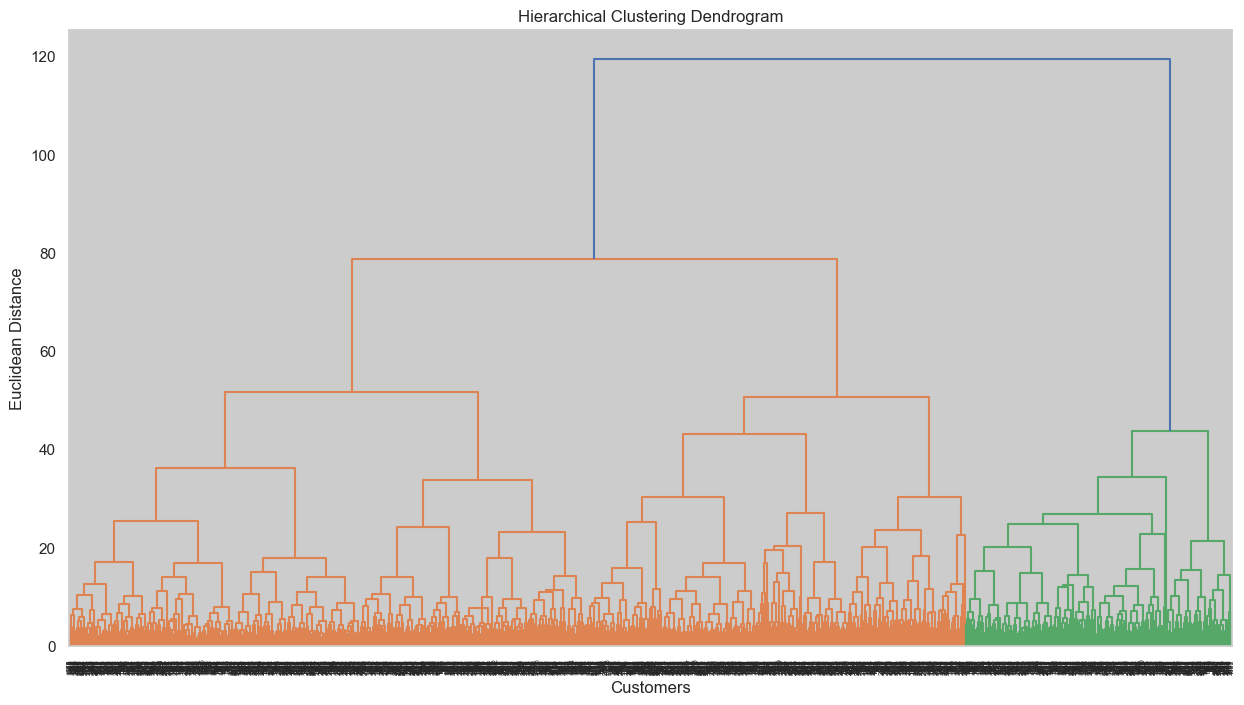

In [96]:
# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [97]:
# --- Elbow Method for Hierarchical ---
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    labels = fcluster(linked, k, criterion='maxclust')
    # Compute WCSS manually
    wcss_k = 0
    for cluster in np.unique(labels):
        cluster_points = scaled_values[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss_k += ((cluster_points - centroid) ** 2).sum()
    wcss.append(wcss_k)

    # Silhouette score
    sil_agg= silhouette_score(scaled_values, labels)
    silhouette_scores.append(sil_agg)

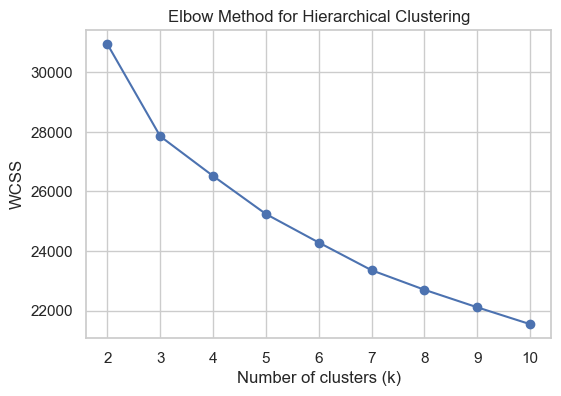

In [98]:
# Plot Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Hierarchical Clustering')
plt.show()

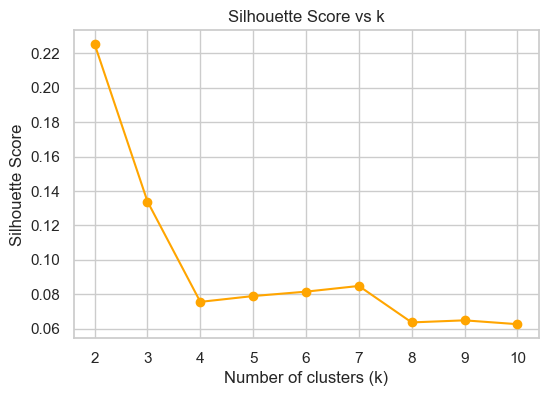

In [99]:
# Plot Silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

In [100]:
# --- Choose best k based on silhouette ---
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best number of clusters (Silhouette): {best_k}")


Best number of clusters (Silhouette): 2


In [101]:
# --- Final clustering with best_k ---
n_clusters = best_k
clean_data['Cluster'] = fcluster(linked, n_clusters, criterion='maxclust')

# --- View cluster sizes and summary ---
print("\nCluster sizes:")
print(clean_data['Cluster'].value_counts().sort_index())


Cluster sizes:
Cluster
1     513
2    1727
Name: count, dtype: int64


In [102]:
# Get only numeric features from your feature list
numeric_features = clean_data[features].select_dtypes(include=['number']).columns

# Calculate the mean for only numeric features
cluster_summary = clean_data.groupby('Cluster')[numeric_features].mean()

print("\n--- Cluster Summary ---")
print(cluster_summary)


--- Cluster Summary ---
               Income        Age  Family_Size  Total_Spending  \
Cluster                                                         
1        77593.578947  57.134503     1.097466     1382.964912   
2        44706.171975  55.914881     2.203822      374.943254   

         Spending_per_person  MntWines_Share  MntFruits_Share  \
Cluster                                                         
1                1328.279077        0.437512         0.047391   
2                 190.512160        0.464710         0.050132   

         MntMeatProducts_Share  MntFishProducts_Share  MntSweetProducts_Share  \
Cluster                                                                         
1                     0.335691               0.069307                0.050601   
2                     0.223908               0.072193                0.050830   

         MntGoldProds_Share  Total_Accepted_Campaigns    Recency  \
Cluster                                                     

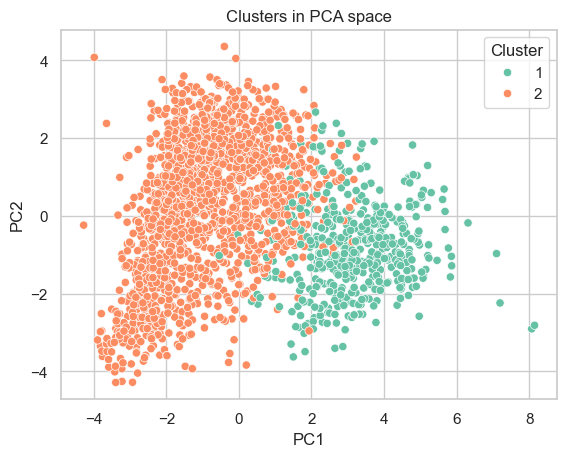

In [103]:
# 4. PCA 2D view
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(scaled_values)
clean_data['PC1'], clean_data['PC2'] = pca_coords[:, 0], pca_coords[:, 1]
sns.scatterplot(data=clean_data, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Clusters in PCA space')
plt.show()

In [104]:
# --- Interpretation example ---
numeric_features = clean_data[features].select_dtypes(include=['number']).columns
categorical_features = clean_data[features].select_dtypes(exclude=['number']).columns

for c in sorted(clean_data['Cluster'].unique()):
    cluster_data = clean_data[clean_data['Cluster'] == c]
    size = len(cluster_data)

    # Numeric averages
    avg_values = cluster_data[numeric_features].mean()

    # # Most common category for categorical columns
    # mode_values = cluster_data[categorical_features].mode().iloc[0]

    print(f"\nCluster {c} (Size: {size}):")
    print("Average numeric values:")
    print(avg_values.to_string())
    print("Most common categories:")
    # print(mode_values.to_string())


Cluster 1 (Size: 513):
Average numeric values:
Income                       77593.578947
Age                             57.134503
Family_Size                      1.097466
Total_Spending                1382.964912
Spending_per_person           1328.279077
MntWines_Share                   0.437512
MntFruits_Share                  0.047391
MntMeatProducts_Share            0.335691
MntFishProducts_Share            0.069307
MntSweetProducts_Share           0.050601
MntGoldProds_Share               0.059498
Total_Accepted_Campaigns         1.155945
Recency                         49.690058
NumWebPurchases_Share            0.255956
NumCatalogPurchases_Share        0.314243
NumStorePurchases_Share          0.425902
NumWebVisitsMonth                2.676413
Most common categories:

Cluster 2 (Size: 1727):
Average numeric values:
Income                       44706.171975
Age                             55.914881
Family_Size                      2.203822
Total_Spending                 374.9432

In [105]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(pca_data, clean_data['Cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.4260


In [106]:
results = {}
results['KMeans'] = sil_kmeans
results['DBSCAN'] = sil_dbscan
results['Hierarchical'] =score

best_model = max(results, key=results.get)
print("Silhouette Scores:", results)
print(f" ********** Best model for deployment: {best_model} ***********")

Silhouette Scores: {'KMeans': 0.46097836103997714, 'DBSCAN': 0.18719860529826826, 'Hierarchical': 0.4259747304622626}
 ********** Best model for deployment: KMeans ***********


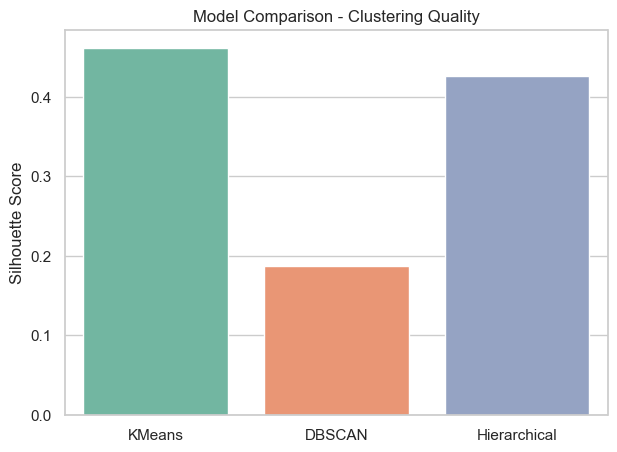

In [107]:
plt.figure(figsize=(7, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.ylabel("Silhouette Score")
plt.title("Model Comparison - Clustering Quality")
plt.show()



In [108]:
#depolyment
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
# %%writefile app.py
# import streamlit as st 
!pip install -q streamlit


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
import pickle

# Save KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save PCA
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

In [127]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained KMeans model and scaler
with open("kmeans_model.pkl", "rb") as f:
    kmeans_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("pca.pkl", "rb") as f:
    pca = pickle.load(f)

# Features used during training
features = [
    'Income', 'Age', 'Family_Size',
    'Total_Spending', 'Spending_per_person',
    'MntWines_Share', 'MntFruits_Share', 'MntMeatProducts_Share',
    'MntFishProducts_Share', 'MntSweetProducts_Share', 'MntGoldProds_Share',
    'Total_Accepted_Campaigns', 'Recency',
    'NumWebPurchases_Share', 'NumCatalogPurchases_Share', 'NumStorePurchases_Share',
    'NumWebVisitsMonth'
]

# Mapping clusters to meaningful customer categories (example – adjust as per your analysis)
cluster_labels = {
    0: "Luxury Spenders ",                 
    1: "Budget-Conscious Shoppers ",      
    2: "Loyal Families ",             
    3: "Occasional Discount Hunters "      
}

# Streamlit App
st.set_page_config(page_title="Customer Segmentation", page_icon="📊", layout="wide")

# Banner / Header
st.markdown("""
    <div style="background-color: #f5f9ff; padding: 15px; border-radius: 12px; text-align: center;">
        <h1 style="color: #2E86C1;">📊 Customer Segmentation Model</h1>
        <p style="color: #34495E; font-size: 18px;">
            Upload your Customer dataset and discover segmentataion of customers.<br>
            Gain insights into Nature and behaviour of Customers.
        </p>
    </div>
""", unsafe_allow_html=True)

# File Upload
uploaded_file = st.file_uploader("Upload your dataset (CSV format)", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.subheader(" Preview of Uploaded Data")
    st.dataframe(df.head())

    # Check for missing features
    missing = [col for col in features if col not in df.columns]
    if missing:
        st.error(f"❌ Missing required features in uploaded dataset: {missing}")
    else:
        # Keep only the features used during training
        df_model = df[features]

        # Preprocessing
        X_scaled = scaler.transform(df_model)
        X_pca = pca.transform(X_scaled)

        # Predict clusters
        clusters = kmeans_model.predict(X_pca)
        df["Customer Segment"] = [cluster_labels[c] for c in clusters]

        # Show results
        st.subheader("📑 Customer Segmentation Results")
        st.dataframe(df.head(20))

        # Visualization
        st.subheader("📊 Cluster Visualization (PCA 2D Projection)")
        fig, ax = plt.subplots(figsize=(8,6))
        sns.scatterplot(
            x=X_pca[:,0], y=X_pca[:,1], hue=df["Customer Segment"],
            palette="Set2", s=60, ax=ax
        )
        ax.set_title("Customer Segments", fontsize=14)
        st.pyplot(fig)

        # Download segmented data
        csv = df.to_csv(index=False).encode("utf-8")
        st.download_button("⬇️ Download Segmented Data", data=csv, file_name="customer_segments.csv", mime="text/csv")
else:
    st.info("👆 Please upload a CSV file to start segmentation.")


Overwriting app.py


In [126]:
!streamlit run app.py

^C
